# Part 2 –Investigating k-NN variants and hyper-parameters

## Importing Required Packages

In [28]:
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Reading Data

In [29]:
#Reading File
os.chdir("C:/Users/karth/data/classification/")
os.getcwd()

# Reading Data, Splitting features and class in test and training Data
def getdata(filename):
    data=np.genfromtxt(filename, delimiter=",")
    return data[:,:-1]  ,  data[:,-1]
# def calculate_distance(ndarray, onedarray):
#     broadcastedarray=np.tile(onedarray, (len(ndarray),1))
#     distance=np.sqrt(np.sum((ndarray-broadcastedarray)**2, axis=1))
#     return distance
def minkowski_distance(ndarray, onedarray, a):
    broadcastedarray=np.tile(onedarray, (len(ndarray),1))
    distance=np.sum(abs(ndarray-broadcastedarray)**a, axis=1)**(1/a)
    return distance

trainingFeatures, trainingClass = getdata("trainingData.csv")
testDataFeatures, testDataClass = getdata("testData.csv")

## Section 1 - Creating a distance-weighted variant of k-NN

using euclidean distance and n value =2

In [30]:
def distance_weighted_accuracy(n,a):
    accuracy_list=[]
    for k in range(1,60):
        accuracy_counter=0        
        for i in range(len(testDataClass)):
            weighted_Class=dict.fromkeys(np.unique(trainingClass),0)
            minkowski_dist=minkowski_distance(trainingFeatures,testDataFeatures[i],a)
            sorted_index=np.argsort(minkowski_dist)[:k]
            nearest_neighbours=trainingClass[sorted_index].copy()
            nearest_neighbours_distance=1/(minkowski_dist[sorted_index]**n)        
            for j in range(k):
                weighted_Class[int(nearest_neighbours[j])]+=nearest_neighbours_distance[j]
            weighted_Class_values=list(weighted_Class.values())
            weighted_Class_keys=list(weighted_Class.keys())
            max_weighted_Class=weighted_Class_keys[weighted_Class_values.index(max(weighted_Class_values))]
            if(max_weighted_Class==int(testDataClass[i])):
                accuracy_counter+=1


        #print(accuracy_counter/len(testDataClass))
        accuracy_list.append(accuracy_counter/len(testDataClass))
    return accuracy_list
    

In [31]:
#distance_weighted_accuracy takes two arguments (n,a)
accuracy_list= distance_weighted_accuracy(2,2)


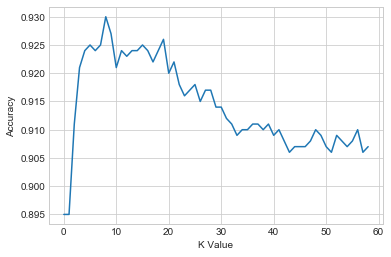

In [32]:
plt.plot(accuracy_list)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

## Section 2: Investigating on improving performance of distance weighted k-NN and basic k-NN 

## Basic k-NN 

In [33]:
def basic_knn(a):
    accuracy_list=[]
    for k in range(1,60):
        accuracy_counter=0
        for i in range(len(testDataFeatures)):
            minkowski_dist=minkowski_distance(trainingFeatures,testDataFeatures[i],a)
            nearest_neighbours=trainingClass[np.argsort(minkowski_dist)[:k]].copy()
            mode=Counter(nearest_neighbours).most_common(1)
            if mode[0][0]==testDataClass[i]:
                accuracy_counter+=1


        #print(" For K={} the accuracy is {}".format(k,(accuracy_counter/len(testDataClass))))
        #print((accuracy_counter/len(testDataClass)))

        accuracy_list.append(accuracy_counter/len(testDataClass))
    return accuracy_list
    

## Using Mahattan Distance for basic k-NN

By specifying the value of a=1 in minkowski distance metric it becomes manhattan distance. 



In [34]:
accuracy_list=basic_knn(1)

## Using Mahattan Distance for distance weighted k-NN

By specifying the value of a=1 in minkowski distance metric it becomes manhattan distance. 

Using n=2

In [35]:
#distance_weighted_accuracy takes two arguments (n,a)
accuracy_list= distance_weighted_accuracy(2,1)


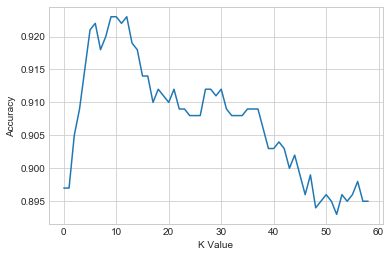

In [36]:
plt.plot(accuracy_list)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()